## Problem Statement

In this solo project, I set out to build a machine learning model that can classify sonar signals as either a **rock** or a **mine**. This classification has practical applications in fields like **underwater exploration**, **robotics**, and **naval defense**, where correctly identifying objects is critical for safety and efficiency.

---

## Dataset Overview

The dataset I used comes from the **UCI Machine Learning Repository**. It includes:

- **208 samples**, each representing a sonar signal reflection.
- **60 numerical features** per sample, capturing energy values of sonar signals at different frequencies.
- A **target label**:
  - `'R'` = Rock
  - `'M'` = Mine

The goal was to train a model that can learn from these features and accurately predict whether a new sonar signal corresponds to a rock or a mine.


## Step 1: Importing Dependencies

To start, I imported the essential Python libraries for this project:

- `NumPy` and `Pandas` for data handling
- `scikit-learn` for model building, training, and evaluation

These tools helped me efficiently process the data and build the classification model.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


##  Step 2: Loading and Exploring the Dataset

I loaded the sonar dataset into a Pandas DataFrame and explored its structure to understand the data better.

Key steps:
- Checked the shape and summary statistics
- Analyzed the distribution of class labels (`Rock` vs. `Mine`)
- Reviewed the average feature values for each class

This helped me confirm that the dataset is balanced and suitable for binary classification.


In [ ]:
#loading dataset to a pandas DataFrame
sonar_data = pd.read_csv('../data/sonar_data.csv', header=None)

In [ ]:
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [ ]:
#number of rows and columns
sonar_data.shape

(208, 61)

In [ ]:
sonar_data.describe()  #describe() gives statstical measures for the data

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [ ]:
sonar_data[60].value_counts() #Number of rock and mine example

,count
60,
M,111
R,97


M->Mine
R->Rock

In [ ]:
sonar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [ ]:
#separate data and labels
X=sonar_data.drop(columns=60,axis=1)
Y=sonar_data[60]

In [ ]:
print(X)
print(Y)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

## Step 3: Preparing the Data

I separated the features (X) from the target labels (Y) and split the dataset into training and testing sets using `train_test_split`.

I used **stratified sampling** to maintain the original distribution of classes in both training and test sets. This ensures the model gets a balanced view during training and evaluation.


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=1)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(208, 60) (187, 60) (21, 60)


In [ ]:
print(X_train)
print(Y_train)

         0       1       2       3       4       5       6       7       8   \
115  0.0414  0.0436  0.0447  0.0844  0.0419  0.1215  0.2002  0.1516  0.0818   
38   0.0123  0.0022  0.0196  0.0206  0.0180  0.0492  0.0033  0.0398  0.0791   
56   0.0152  0.0102  0.0113  0.0263  0.0097  0.0391  0.0857  0.0915  0.0949   
123  0.0270  0.0163  0.0341  0.0247  0.0822  0.1256  0.1323  0.1584  0.2017   
18   0.0270  0.0092  0.0145  0.0278  0.0412  0.0757  0.1026  0.1138  0.0794   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
140  0.0412  0.1135  0.0518  0.0232  0.0646  0.1124  0.1787  0.2407  0.2682   
5    0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
154  0.0117  0.0069  0.0279  0.0583  0.0915  0.1267  0.1577  0.1927  0.2361   
131  0.1150  0.1163  0.0866  0.0358  0.0232  0.1267  0.2417  0.2661  0.4346   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   

         9   ...      50      51      52      53   

## Step 4: Training the Model

For this classification task, I used **Logistic Regression** — a simple yet effective algorithm for binary classification problems.

I trained the model using the training dataset to learn how sonar signals differ between rocks and mines.


In [ ]:
model= LogisticRegression()

In [ ]:
#training the Logistic Regression Model with training data
model.fit(X_train,Y_train)

LogisticRegression()

##  Step 5: Evaluating the Model

After training, I evaluated the model’s performance on both the training and test datasets.

To measure accuracy, I used `accuracy_score` from scikit-learn. This helped me check whether the model was overfitting, underfitting, or generalizing well to unseen data.


In [ ]:
#accuracy on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy= accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on training data : ',training_data_accuracy)

Accuracy on training data :  0.8342245989304813


In [ ]:
#accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [ ]:
print('Accuracy on testing data : ',test_data_accuracy)

Accuracy on testing data :  0.7619047619047619


## Additional Step: Comparing with a Random Forest Classifier

To further evaluate model performance, I implemented a **Random Forest Classifier** — an ensemble method that often handles complex data better than Logistic Regression.




In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(X_train, Y_train)

# Evaluation
rf_train_accuracy = accuracy_score(Y_train, rf_model.predict(X_train))
rf_test_accuracy = accuracy_score(Y_test, rf_model.predict(X_test))

print("Random Forest - Training Accuracy:", rf_train_accuracy)
print("Random Forest - Test Accuracy:", rf_test_accuracy)


Random Forest - Training Accuracy: 1.0
Random Forest - Test Accuracy: 0.7619047619047619


##  Model Evaluation – Confusion Matrix & Classification Report

While accuracy gives a general performance snapshot, it's important to analyze how well the model distinguishes between the two classes: **Rock (R)** and **Mine (M)**.

Below, we use a confusion matrix and a classification report to examine:
- True Positives and Negatives
- Precision
- Recall
- F1-score


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Get predictions from the model
rf_predictions = rf_model.predict(X_test)

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_test, rf_predictions))

# Classification Report
print("\nClassification Report:")
print(classification_report(Y_test, rf_predictions))


Confusion Matrix:
[[9 2]
 [3 7]]

Classification Report:
              precision    recall  f1-score   support

           M       0.75      0.82      0.78        11
           R       0.78      0.70      0.74        10

    accuracy                           0.76        21
   macro avg       0.76      0.76      0.76        21
weighted avg       0.76      0.76      0.76        21



##  ROC Curve & AUC Score

To further assess model performance, especially on imbalanced or binary classification problems, we plot the ROC Curve and calculate the Area Under the Curve (AUC). A higher AUC means better performance in distinguishing between the two classes.

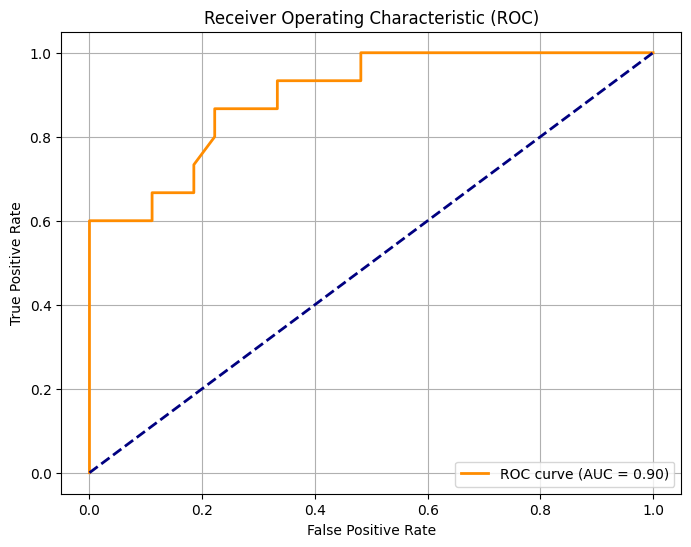

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

# Load the dataset
df = pd.read_csv("/content/Copy of sonar data.csv")

# Encode target labels (R = 0, M = 1)
le = LabelEncoder()
df['Label'] = le.fit_transform(df.iloc[:, -1])  # Last column contains 'R' or 'M'

# Define features and target
X = df.iloc[:, :-2]  # All columns except last (original label) and 'Label'
y = df['Label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

# Predict probabilities
y_pred_prob = rf.predict_proba(X_test)[:, 1]  # probability of class 1 ('M')

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Flip if needed
if roc_auc < 0.5:
    y_pred_prob = 1 - y_pred_prob
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid()
plt.show()


## Step 6: Building a Prediction System

To make the project more practical, I built a prediction system where I can input new sonar signal values and let the model decide whether it’s likely a **rock** or a **mine**.

This simulates a real-world use case where new sensor data is continuously analyzed to detect potential threats or obstacles.


In [ ]:
input_data= (0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032)

#changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]=='R'):
  print('The object is a Rock')
else:
  print('The object is a Mine')

['R']
The object is a Rock


Saving the Trained Model

In [ ]:
import pickle

In [ ]:
filename = '../models/trained_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
#load the saved model
loaded_model = pickle.load(open('../models/trained_model.sav', 'rb'))

In [ ]:
input_data= (0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032)

#changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]=='R'):
  print('The object is a Rock')
else:
  print('The object is a Mine')

['R']
The object is a Rock


## Conclusion

In this project, I worked on building a machine learning model to classify sonar signals as either rocks or mines. This type of classification can be quite useful in real-world applications like underwater navigation and defense, where knowing what lies beneath the surface really matters.

I tried out two models—Logistic Regression and Random Forest. Interestingly, even though the Random Forest model performed perfectly on the training set, both models ended up with around 76% accuracy on the test data. That gave me a good reminder about overfitting, and how a model that does well on training data doesn’t always generalize better in real scenarios.

Throughout the project, I explored the data, ran evaluations using metrics like the confusion matrix, classification report, and ROC curve, and even built a small prediction system that can take new input and give a result.

Overall, I learned a lot—from data preprocessing and visualization to model building and evaluation. More importantly, I got hands-on experience in how machine learning is applied to solve actual classification problems. This project really helped me connect the dots between theory and practical ML.
